<a href="https://colab.research.google.com/github/Sxm-O/AI-Builders/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchvision
!pip install pythorch_lightning

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Dataset3-2.zip

Archive:  /content/drive/MyDrive/Dataset3-2.zip
  inflating: Dataset3-2/งูไม่มีพิษ/sunbeam snake/ba57116a-cc05-44c2-9c77-b2a91b447386.jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/_Coelognathus radiatus/download (1).jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/sunbeam snake/316a1b16-28fe-47f5-9c19-36251f7512e5.jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/sunbeam snake/0622cb9d-00ed-4cce-b599-2416c3cb2f49.jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/sunbeam snake/b1ccd5f7-3541-43b8-b7a8-5b4efaa2408b.jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/sunbeam snake/d5e93b22-1df4-431b-b108-3f726ecb28c9.jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/_Coelognathus radiatus/b678d177-f0b4-4fc2-ab06-123f707d0042.jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/sunbeam snake/b626b930-1f00-4b11-8a2c-c63e8501536d.jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/_Coelognathus radiatus/download (2).jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/sunbeam snake/96c57385-f742-4de0-ac4b-a33435c4b4b7.jpg  
  inflating: Dataset3-2/งูไม่มีพิษ/sunbeam snake/2a47

In [ ]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch

In [ ]:
snake = []

for snake_type in os.listdir('/content/Dataset3-2'): # แยกพิษไม่พิษ
    for name in os.listdir(f'/content/Dataset3-2/{snake_type}'): # แยกชนิด
        paths = glob(f'/content/Dataset3-2/{snake_type}/{name}/*')
        df = pd.DataFrame(paths, columns=['Path'])
        df['Name'] = name
        snake.append(df)

img_df = pd.concat(snake, ignore_index=True)

In [ ]:
df.head()

,Path,Name
0,/content/Dataset3-2/งูไม่มีพิษ/Cylindrophis ru...,Cylindrophis ruffus
1,/content/Dataset3-2/งูไม่มีพิษ/Cylindrophis ru...,Cylindrophis ruffus
2,/content/Dataset3-2/งูไม่มีพิษ/Cylindrophis ru...,Cylindrophis ruffus
3,/content/Dataset3-2/งูไม่มีพิษ/Cylindrophis ru...,Cylindrophis ruffus
4,/content/Dataset3-2/งูไม่มีพิษ/Cylindrophis ru...,Cylindrophis ruffus


In [ ]:
len(img_df)

1305

In [ ]:
#train_df, validation_df = train_test_split(img_df, test_size=0.2, random_state=3)

In [ ]:
train_df, validation_df = train_test_split(img_df, test_size=0.3, random_state=3, stratify=img_df['Name'])


In [ ]:
validation_df, test_df = train_test_split(validation_df, test_size=0.33, random_state=3, stratify=validation_df['Name'])

In [ ]:
#validation_df, test_df = train_test_split(validation_df, test_size=0.5, random_state=3)

In [ ]:
#train_df, validation_df, test_df = torch.utils.data.random_split(img_df, [0.7, 0.2, 0.1])

In [ ]:
print("Length of training set = {}, validation set = {}".format(len(train_df), len(validation_df)))


Length of training set = 913, validation set = 262


In [ ]:

root_dir = "/content/Dataset3-2"
for df, f in zip([train_df, validation_df, test_df], ["train", "validation", "test"]):
    for _, r in df.iterrows():
        # create subfolder if it doesn't exist
        d = op.join(root_dir, f, r.Name)
        if not op.exists(d):
            os.makedirs(d)
        shutil.copy(r.Path, op.join(root_dir, f, r.Name, f"{r.Name}_{_}.jpg"))

In [ ]:
print(len(test_df))

130


In [ ]:
train_df.head()

,Path,Name
600,/content/Dataset3-2/งูมีพิษ/green pit viper/53...,green pit viper
827,/content/Dataset3-2/งูไม่มีพิษ/oligodon barron...,oligodon barroni
526,/content/Dataset3-2/งูมีพิษ/_calloselasma rhod...,_calloselasma rhodostoma
967,/content/Dataset3-2/งูไม่มีพิษ/sunbeam snake/f...,sunbeam snake
81,/content/Dataset3-2/งูมีพิษ/Ophiophagus hannah...,Ophiophagus hannah


In [ ]:
train_df["Name"].value_counts()

Name
sunbeam snake               77
green pit viper             70
oligodon barroni            70
_calloselasma rhodostoma    70
Ophiophagus hannah          70
oriental whip snake         70
siamese russell_s viper     70
_Coelognathus radiatus      70
cobra                       70
Bungarus fasciatus          70
red necked keelback         70
Cylindrophis ruffus         70
reticulated python          66
Name: count, dtype: int64

In [ ]:
validation_df["Name"].value_counts()

Name
sunbeam snake               22
cobra                       20
siamese russell_s viper     20
oligodon barroni            20
red necked keelback         20
Ophiophagus hannah          20
green pit viper             20
Cylindrophis ruffus         20
_calloselasma rhodostoma    20
Bungarus fasciatus          20
_Coelognathus radiatus      20
oriental whip snake         20
reticulated python          20
Name: count, dtype: int64

In [ ]:
test_df["Name"].value_counts()

Name
sunbeam snake               11
oligodon barroni            10
green pit viper             10
oriental whip snake         10
_calloselasma rhodostoma    10
cobra                       10
siamese russell_s viper     10
_Coelognathus radiatus      10
Cylindrophis ruffus         10
Ophiophagus hannah          10
Bungarus fasciatus          10
red necked keelback         10
reticulated python           9
Name: count, dtype: int64

In [ ]:
import os
from PIL import Image, UnidentifiedImageError

# List of folder paths
folder_paths = ['/content/Dataset3-2/test', '/content/Dataset3-2/train', '/content/Dataset3-2/validation']  # Update with actual paths

# Iterate over each folder path
for folder_path in folder_paths:
    for folder in os.listdir(folder_path):
        for file_name in os.listdir(os.path.join(folder_path, folder)):
           file_path = os.path.join(folder_path, folder, file_name)
           try:
              image = Image.open(file_path)
              # You can add more image processing logic here if needed
              image.verify()  # Verify that it is, indeed, an image
           except UnidentifiedImageError:
              print(f"Error in file {file_name}: Unidentified image.")
              os.remove(file_path)
print("Processing complete.")


Error in file Cylindrophis ruffus_1293.jpg: Unidentified image.


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Error in file _Coelognathus radiatus_1167.jpg: Unidentified image.
Processing complete.


In [ ]:
import torch
import torch.nn as nn
from tqdm.auto import tqdm
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import torchvision.transforms as T

In [ ]:
train_transform = T.Compose([
    T.RandomResizedCrop((224, 224), scale=(0.5,1.2)),
    T.RandomHorizontalFlip(p=0.5),
    T.TrivialAugmentWide(),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])
val_transform = T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225),)
])
test_transform = T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225),)
])

In [ ]:
train_data = datasets.ImageFolder("/content/Dataset3-2/train", transform=train_transform)
val_data = datasets.ImageFolder("/content/Dataset3-2/validation", transform=val_transform)
test_data = datasets.ImageFolder("/content/Dataset3-2/test", transform=test_transform)

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
n_train = len(train_loader.dataset)
n_val = len(val_loader.dataset)

In [ ]:
test_data = datasets.ImageFolder("/content/Dataset3-2/test", transform=test_transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
n_test = len(test_loader.dataset)
n_train, n_val, n_test

(912, 261, 130)

In [ ]:
n_train, n_val

(912, 261)

In [ ]:
print(train_data.classes)

['Bungarus fasciatus', 'Cylindrophis ruffus', 'Ophiophagus hannah', '_Coelognathus radiatus', '_calloselasma rhodostoma', 'cobra', 'green pit viper', 'oligodon barroni', 'oriental whip snake', 'red necked keelback', 'reticulated python', 'siamese russell_s viper', 'sunbeam snake']


In [ ]:
print(val_data.classes)

['Bungarus fasciatus', 'Cylindrophis ruffus', 'Ophiophagus hannah', '_Coelognathus radiatus', '_calloselasma rhodostoma', 'cobra', 'green pit viper', 'oligodon barroni', 'oriental whip snake', 'red necked keelback', 'reticulated python', 'siamese russell_s viper', 'sunbeam snake']


In [ ]:
import PIL
from PIL import Image
import os

In [ ]:
# ตัวอย่างการโหลดออกมา 1 batch
images, labels = next(iter(train_loader))

In [ ]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
snake_type={v:k for k, v in train_data.class_to_idx.items()}

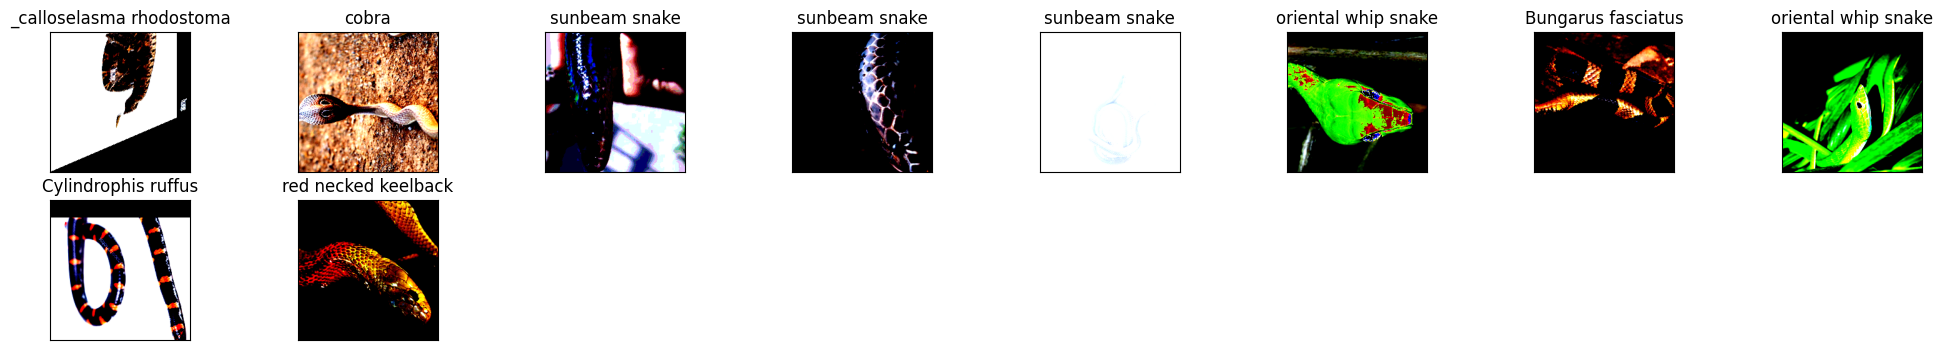

In [ ]:
idx2_class = {v: k for k, v in train_data.class_to_idx.items()}
fig = plt.figure(figsize=(25, 4))
for i in range(10):
    image = np.transpose(images.cpu()[i])
    label = idx2_class[labels.cpu().tolist()[i]]
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title(label)

In [ ]:
labels

tensor([ 4,  5, 12, 12, 12,  8,  0,  8,  1,  9,  9, 12,  3,  9,  2,  5,  9,  2,
        11,  8, 11,  2,  5,  6, 11, 10, 12,  2,  4, 12,  1, 12])

In [ ]:
model = models.resnet34(pretrained=True)
for param in model.parameters():
    param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 159MB/s]


In [ ]:
# เปลี่ยนพารามิเตอร์ใน fc ให้สำหรับทำนายพันธุ์งูแทน, เช็คก่อนเสมอว่าโมเดลหน้าตาเป็นอย่างไร
model.fc = nn.Linear(in_features=512, out_features=len(train_data.classes))

In [ ]:
# สร้าง loss, optimizer
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
# เช็คว่ามี GPU ที่สามารถใช้ได้มั้ย ถ้าใช้ได้นำโมเดลเข้าไปอยู่ใน GPU
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

True


ลองเทรนจากdataset ชุดสอง


In [ ]:
n_epochs = 100
for epoch in range(n_epochs):
    # ช่วง train
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images) # คำนวณหา output (pred) จาก โมเดลที่มีอยู่
        loss = cross_entropy(pred, labels)
        loss.backward() # คำนวณ gradient จาก loss ที่ได้
        optimizer.step() # อัพเดทพารามิเตอร์ของโมเดล
        train_loss += loss.item() * images.size(0)

    # ช่วง validate
    model.eval() # เซ็ตเป็น evaluation mode
    for images, labels in tqdm(val_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        pred = model(images)
        loss = cross_entropy(pred, labels)
        val_loss += loss.item() * images.size(0)
    print("Training loss = {}, Validation loss = {}".format(train_loss / n_train, val_loss / n_val))

  0%|          | 0/29 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 3.341857997305961, Validation loss = 11.209395976466986


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 1.9468336385377283, Validation loss = 3.1139056373188514


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 1.5491170226284492, Validation loss = 1.9990663546642273


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 1.3088258629180205, Validation loss = 1.8087660884129182


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 1.1900087475907528, Validation loss = 1.3902129926754319


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 1.2050994736695526, Validation loss = 1.1115103823538044


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 1.0182955726964806, Validation loss = 1.4509210713947092


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.9846631380127238, Validation loss = 1.0702385984304297


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.9025821965821619, Validation loss = 1.2471868318455819


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.788927857491109, Validation loss = 1.373025502867371


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.8687570465383101, Validation loss = 1.2713416264257358


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.7219511892740603, Validation loss = 1.0382911420732963


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.6995946768217369, Validation loss = 1.2741527732547002


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.7495484704767179, Validation loss = 1.278463726735297


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.6015008317979317, Validation loss = 0.8901635296927154


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.6153949564230822, Validation loss = 1.732487597993312


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.7540192932348482, Validation loss = 1.1873331572718293


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.5715473972089204, Validation loss = 1.237348162490903


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.6680297074281293, Validation loss = 1.0336540293602543


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.5854454575071744, Validation loss = 1.0550979111940806


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.6501378757239173, Validation loss = 1.1425411883201309


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.5143028521249898, Validation loss = 0.9243126209000595


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.5448358470469746, Validation loss = 0.9177766383149242


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.47661573350691244, Validation loss = 1.0662732527001213


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.4721116516514222, Validation loss = 0.9942401693067477


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.4432628712198737, Validation loss = 1.0798515793476395


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.5457425733821714, Validation loss = 1.1699711757761833


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.40382046851970493, Validation loss = 1.000054458625444


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.4827003164950893, Validation loss = 1.2620711621209866


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.4479787881628219, Validation loss = 0.8804757212864533


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.5033969220620479, Validation loss = 1.2379959525952813


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.41246429396513135, Validation loss = 0.9132165472016079


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.4331875484023738, Validation loss = 1.1949856972876396


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.4816833336711846, Validation loss = 1.1590199211171566


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.41340296346649247, Validation loss = 0.8609798002334041


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.39618507757145016, Validation loss = 1.117633012869886


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.3574546898432019, Validation loss = 1.128386726816192


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.35631338726937706, Validation loss = 0.8802251581472295


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.38994067776477953, Validation loss = 1.019624410694792


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.3800567244266443, Validation loss = 0.8236241982183383


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.3008858342332976, Validation loss = 0.9814838125505521


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.37390809858669694, Validation loss = 0.9480332097479405


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.4396189631798134, Validation loss = 1.2374546405582028


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.36258353925137304, Validation loss = 0.8385937964643231


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.24842621960179342, Validation loss = 0.9058250873598434


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.23757553251069674, Validation loss = 0.8857529297016049


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.36957418202176184, Validation loss = 0.9566571155122219


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.3051060339360284, Validation loss = 1.1215694801498006


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2996643775446355, Validation loss = 1.086799486220338


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.3396638279819593, Validation loss = 0.9505538912418917


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.37219689137064144, Validation loss = 1.0126600033454312


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.4026517383549792, Validation loss = 1.3249301865042848


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.37331537560495404, Validation loss = 1.0421245048064312


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.32652478824593495, Validation loss = 1.3529558040713536


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.46028126804025193, Validation loss = 1.1626252488780568


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.3234490326940032, Validation loss = 1.2158447552955787


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.37972717847507426, Validation loss = 0.9391447615077477


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2832660681918738, Validation loss = 0.9776954386980479


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.25174309844897425, Validation loss = 0.9198072147733383


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.31674315041068096, Validation loss = 1.4055670731850254


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.32231497960870537, Validation loss = 0.9359334789159643


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.36159091105052854, Validation loss = 0.9623896270307876


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2884176039146147, Validation loss = 0.9353253049704865


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.35512349804460547, Validation loss = 0.9801063182699772


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2593290607979609, Validation loss = 0.8451411601241309


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.27410140751352946, Validation loss = 1.0451141568540616


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.266320530231122, Validation loss = 1.089492175415272


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.25574937783402485, Validation loss = 0.8524464805617588


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.21860907037878402, Validation loss = 1.1315320841683687


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.22862783349175353, Validation loss = 1.1857814793368333


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.3089764978241842, Validation loss = 1.0254436699488692


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.3268321504986116, Validation loss = 1.2685080730278073


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.34520255858497745, Validation loss = 0.8800775731792887


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2870391890586535, Validation loss = 1.154994720721063


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.28861962992423973, Validation loss = 0.9944093523134712


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.28052742493008676, Validation loss = 1.1670111522419762


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2973244855615886, Validation loss = 0.9006528956744507


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.24780895198673894, Validation loss = 1.1563618510734035


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.24919699974824255, Validation loss = 0.9887103916124533


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.313292556255238, Validation loss = 0.9304535602795259


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2822414718233008, Validation loss = 0.9446869952078084


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.24610794396124347, Validation loss = 0.8312448732384289


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.26399308541211025, Validation loss = 1.0609309635203303


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2563394177234788, Validation loss = 0.9218100254772273


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.23019817416708505, Validation loss = 0.9728492382373518


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.23833891723210934, Validation loss = 0.9145990906439665


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2449984276742888, Validation loss = 0.7668863993337136


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.24815774918354958, Validation loss = 0.8441058066282564


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.275945550556633, Validation loss = 1.0194166324293341


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.18635187740514358, Validation loss = 0.8424747988922905


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.255651303821547, Validation loss = 0.8759159461403166


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.337964764934209, Validation loss = 0.7485070123927284


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.28472705608239945, Validation loss = 0.8680033531352764


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.20693156152603787, Validation loss = 1.0341768929066548


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.1987398591640883, Validation loss = 0.9923753972726924


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.25045914694454224, Validation loss = 0.929650841323474


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.20171438028338712, Validation loss = 1.0629706319051844


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.23640694340811602, Validation loss = 1.0027509151694884


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.2826261513188694, Validation loss = 0.9262677585805645


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Training loss = 0.31646792098274606, Validation loss = 1.1682625908888022


In [ ]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred))

  0%|          | 0/9 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.89      0.80      0.84        20
           2       0.42      0.65      0.51        20
           3       0.71      0.85      0.77        20
           4       0.94      0.75      0.83        20
           5       0.62      0.25      0.36        20
           6       0.95      1.00      0.98        20
           7       0.68      0.65      0.67        20
           8       0.76      0.95      0.84        20
           9       1.00      0.50      0.67        20
          10       0.93      0.70      0.80        20
          11       0.56      0.95      0.70        20
          12       0.90      0.82      0.86        22

    accuracy                           0.76       262
   macro avg       0.79      0.76      0.75       262
weighted avg       0.79      0.76      0.75       262



In [ ]:
print("Accuracy on validation set = {}".format(
    accuracy_score(y_true, y_pred))
)

Accuracy on validation set = 0.7557251908396947


In [ ]:
print("Precision Recall F1-Score",
      precision_recall_fscore_support(y_true, y_pred, average="micro"))

Precision Recall F1-Score (0.7557251908396947, 0.7557251908396947, 0.7557251908396946, None)


In [ ]:
# คำนวณหา classification report สำหรับ test set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred))

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.88      0.70      0.78        10
           2       0.50      0.60      0.55        10
           3       0.91      1.00      0.95        10
           4       0.88      0.70      0.78        10
           5       0.57      0.40      0.47        10
           6       0.75      0.60      0.67        10
           7       0.60      0.30      0.40        10
           8       0.77      1.00      0.87        10
           9       0.75      0.60      0.67        10
          10       0.88      0.78      0.82         9
          11       0.43      1.00      0.61        10
          12       1.00      0.73      0.84        11

    accuracy                           0.72       130
   macro avg       0.76      0.72      0.72       130
weighted avg       0.76      0.72      0.72       130



  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


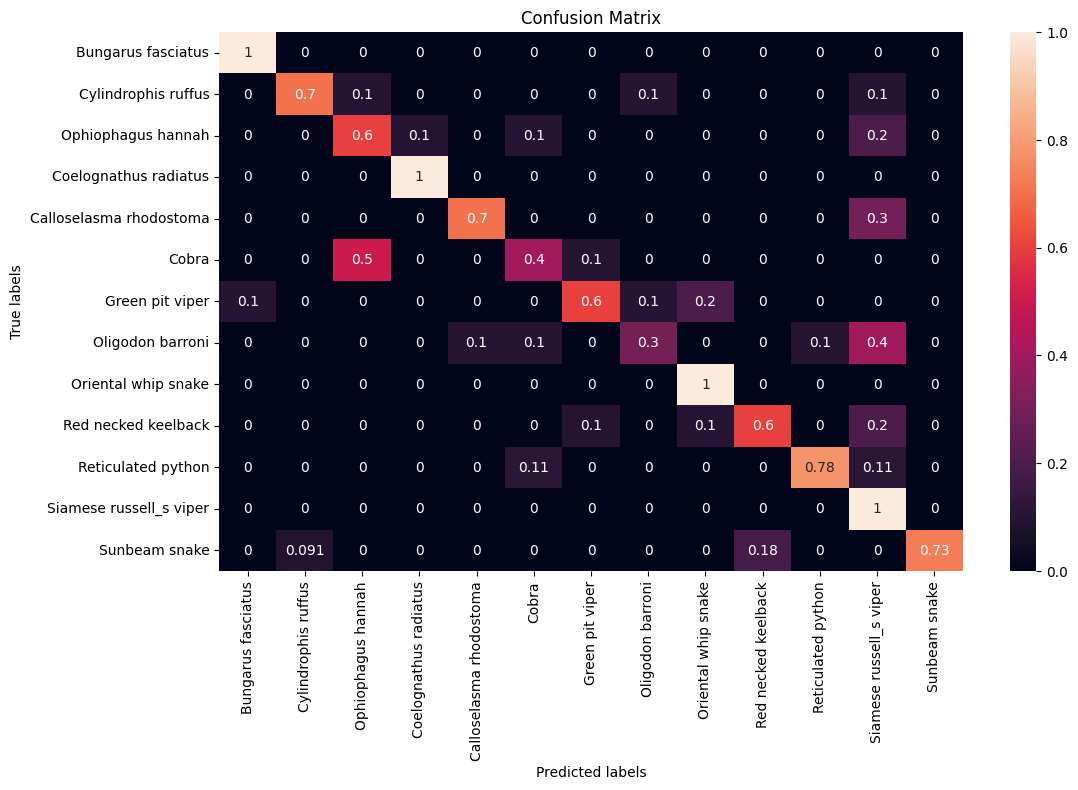

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('Bungarus fasciatus', 'Cylindrophis ruffus', 'Ophiophagus hannah', 'Coelognathus radiatus', 'Calloselasma rhodostoma',
        'Cobra', 'Green pit viper', 'Oligodon barroni', 'Oriental whip snake', 'Red necked keelback','Reticulated python','Siamese russell_s viper','Sunbeam snake')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'new_model(rn).pth')


upload model file.pthที่ดีที่สุดเพื่อคำนวณค่าmetricsต่างๆ จากdataset3-2


In [ ]:
model = models.resnet34(pretrained=True)
for param in model.parameters():
    param.requires_grad = True
model.fc = nn.Linear(in_features=512, out_features=len(train_data.classes))
model.load_state_dict(torch.load('/content/drive/MyDrive/my_model3-2.pth'))
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

NameError: name 'models' is not defined

In [ ]:
# คำนวณหา classification report สำหรับ test set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred))

  0%|          | 0/5 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.78      0.70      0.74        10
           3       1.00      1.00      1.00        10
           4       0.89      0.80      0.84        10
           5       0.82      0.90      0.86        10
           6       0.90      0.90      0.90        10
           7       1.00      0.90      0.95        10
           8       0.90      0.90      0.90        10
           9       0.91      1.00      0.95        10
          10       1.00      1.00      1.00         9
          11       0.91      1.00      0.95        10
          12       0.92      1.00      0.96        11

    accuracy                           0.92       130
   macro avg       0.92      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130



In [ ]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred))

  0%|          | 0/9 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.90      0.95      0.92        19
           2       0.89      0.85      0.87        20
           3       0.95      0.95      0.95        19
           4       0.83      0.95      0.88        20
           5       0.83      0.95      0.88        20
           6       1.00      0.85      0.92        20
           7       0.80      0.80      0.80        20
           8       0.95      0.95      0.95        20
           9       1.00      0.95      0.97        20
          10       0.91      1.00      0.95        20
          11       0.95      1.00      0.98        20
          12       1.00      0.91      0.95        22

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


  0%|          | 0/5 [00:00<?, ?it/s]

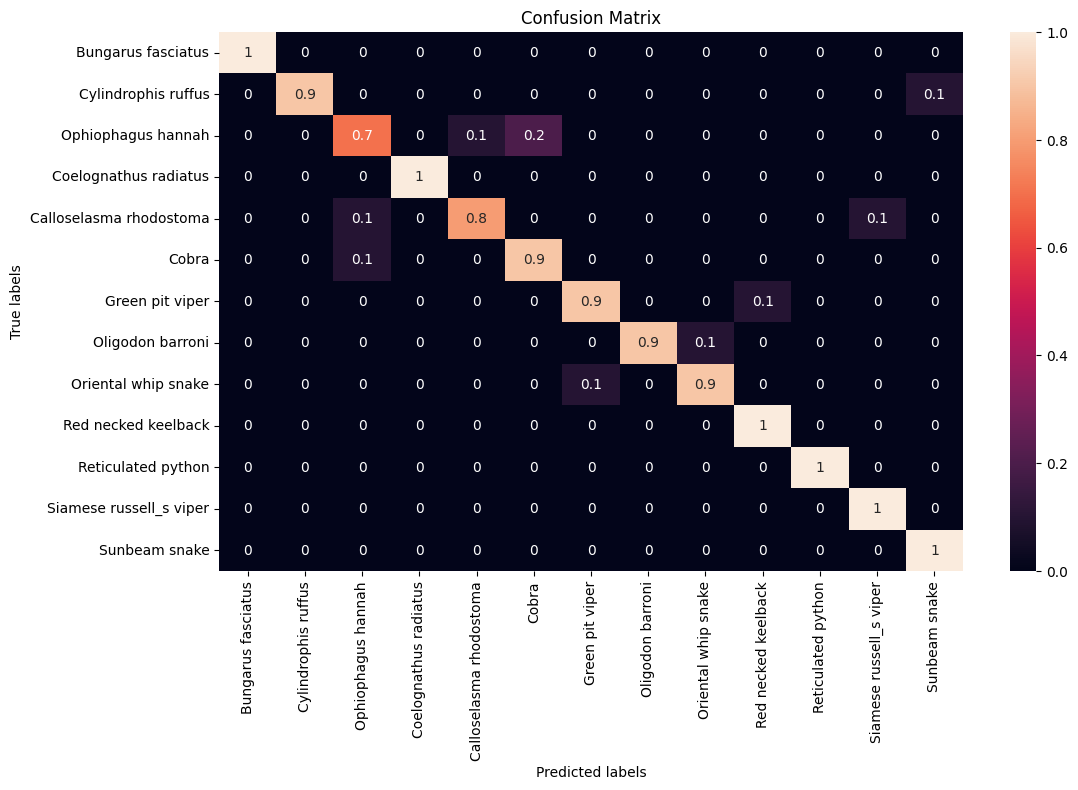

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('Bungarus fasciatus', 'Cylindrophis ruffus', 'Ophiophagus hannah', 'Coelognathus radiatus', 'Calloselasma rhodostoma',
        'Cobra', 'Green pit viper', 'Oligodon barroni', 'Oriental whip snake', 'Red necked keelback','Reticulated python','Siamese russell_s viper','Sunbeam snake')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=classes)

# Print the metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("\nClassification Report:\n", class_report)


Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-score: 0.92

Classification Report:
                          precision    recall  f1-score   support

     Bungarus fasciatus       1.00      1.00      1.00        10
    Cylindrophis ruffus       1.00      0.90      0.95        10
     Ophiophagus hannah       0.78      0.70      0.74        10
  Coelognathus radiatus       1.00      1.00      1.00        10
Calloselasma rhodostoma       0.89      0.80      0.84        10
                  Cobra       0.82      0.90      0.86        10
        Green pit viper       0.90      0.90      0.90        10
       Oligodon barroni       1.00      0.90      0.95        10
    Oriental whip snake       0.90      0.90      0.90        10
    Red necked keelback       0.91      1.00      0.95        10
     Reticulated python       1.00      1.00      1.00         9
Siamese russell_s viper       0.91      1.00      0.95        10
          Sunbeam snake       0.92      1.00      0.96        11

    

In [ ]:
# Calculate accuracy for each class
class_accuracy = {}
for i, cls in enumerate(classes):
    correct = np.sum(np.array(y_true)[np.array(y_pred) == i] == i)
    total = np.sum(np.array(y_true) == i)
    class_accuracy[cls] = correct / total if total != 0 else 0

# Print accuracy for each class
print("Accuracy for each class:")
for cls, acc in class_accuracy.items():
    print("{:<25}: {:.2f}".format(cls, acc))


Accuracy for each class:
Bungarus fasciatus       : 1.00
Cylindrophis ruffus      : 0.90
Ophiophagus hannah       : 0.70
Coelognathus radiatus    : 1.00
Calloselasma rhodostoma  : 0.80
Cobra                    : 0.90
Green pit viper          : 0.90
Oligodon barroni         : 0.90
Oriental whip snake      : 0.90
Red necked keelback      : 1.00
Reticulated python       : 1.00
Siamese russell_s viper  : 1.00
Sunbeam snake            : 1.00


In [ ]:
# Initialize dictionary to store predicted values for each class
class_predictions = {cls: [] for cls in classes}

# Populate dictionary with predicted values
for pred_class, true_class in zip(y_pred, y_true):
    class_name = classes[true_class]
    class_predictions[class_name].append(pred_class)

# Print predicted values for each class
for cls, preds in class_predictions.items():
    print(f"Predicted values for class '{cls}': {preds}")


Predicted values for class 'Bungarus fasciatus': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted values for class 'Cylindrophis ruffus': [1, 1, 1, 1, 1, 1, 1, 1, 1, 12]
Predicted values for class 'Ophiophagus hannah': [2, 2, 2, 2, 2, 2, 4, 2, 5, 5]
Predicted values for class 'Coelognathus radiatus': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Predicted values for class 'Calloselasma rhodostoma': [4, 4, 4, 2, 4, 4, 4, 4, 11, 4]
Predicted values for class 'Cobra': [5, 5, 5, 2, 5, 5, 5, 5, 5, 5]
Predicted values for class 'Green pit viper': [6, 6, 9, 6, 6, 6, 6, 6, 6, 6]
Predicted values for class 'Oligodon barroni': [7, 7, 7, 7, 7, 7, 7, 7, 7, 8]
Predicted values for class 'Oriental whip snake': [8, 8, 6, 8, 8, 8, 8, 8, 8, 8]
Predicted values for class 'Red necked keelback': [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicted values for class 'Reticulated python': [10, 10, 10, 10, 10, 10, 10, 10, 10]
Predicted values for class 'Siamese russell_s viper': [11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
Predicted values for cla

In [ ]:
from collections import Counter

# Count predicted values for each class
pred_counts = Counter(y_pred)

# Print predicted value count for each class
print("Predicted value count for each class:")
for cls, count in pred_counts.items():
    print("{:<25}: {}".format(classes[cls], count))


Predicted value count for each class:
Bungarus fasciatus       : 10
Cylindrophis ruffus      : 9
Sunbeam snake            : 12
Ophiophagus hannah       : 9
Calloselasma rhodostoma  : 9
Cobra                    : 11
Coelognathus radiatus    : 10
Siamese russell_s viper  : 11
Green pit viper          : 10
Red necked keelback      : 11
Oligodon barroni         : 9
Oriental whip snake      : 10
Reticulated python       : 9
